In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = 'nvidia.csv'
nvidia_data = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset to understand its structure
nvidia_data_info = nvidia_data.info()
nvidia_data_head = nvidia_data.head()

nvidia_data_info, nvidia_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       448 non-null    object 
 1   Open       448 non-null    float64
 2   High       448 non-null    float64
 3   Low        448 non-null    float64
 4   Close      448 non-null    float64
 5   Volume     448 non-null    int64  
 6   Adj Close  448 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 24.6+ KB


(None,
          Date    Open    High     Low   Close     Volume  Adj Close
 0  2023-01-03  14.851  14.996  14.096  14.315  401277000  14.305581
 1  2023-01-04  14.567  14.853  14.241  14.749  431324000  14.739295
 2  2023-01-05  14.491  14.564  14.148  14.265  389168000  14.255614
 3  2023-01-06  14.474  15.010  14.034  14.859  405044000  14.849225
 4  2023-01-09  15.284  16.056  15.141  15.628  504231000  15.617719)

In [3]:
# Convert Date column to datetime format
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])

# Sort data by Date in ascending order
nvidia_data = nvidia_data.sort_values('Date').reset_index(drop=True)

# Feature Engineering: Adding a 5-day and 20-day moving average of the 'Close' price as new features
nvidia_data['MA_5'] = nvidia_data['Close'].rolling(window=5).mean()
nvidia_data['MA_20'] = nvidia_data['Close'].rolling(window=20).mean()

# Display the updated data with new features
nvidia_data[['Date', 'Close', 'MA_5', 'MA_20']].head(10)


,Date,Close,MA_5,MA_20
0,2023-01-03,14.315000,NaN,NaN
1,2023-01-04,14.749000,NaN,NaN
2,2023-01-05,14.265000,NaN,NaN
3,2023-01-06,14.859000,NaN,NaN
4,2023-01-09,15.628000,14.7632,NaN
5,2023-01-10,15.909000,15.0820,NaN
6,2023-01-11,16.000999,15.3324,NaN
7,2023-01-12,16.511000,15.7816,NaN
8,2023-01-13,16.899000,16.1896,NaN
9,2023-01-17,17.702000,16.6044,NaN


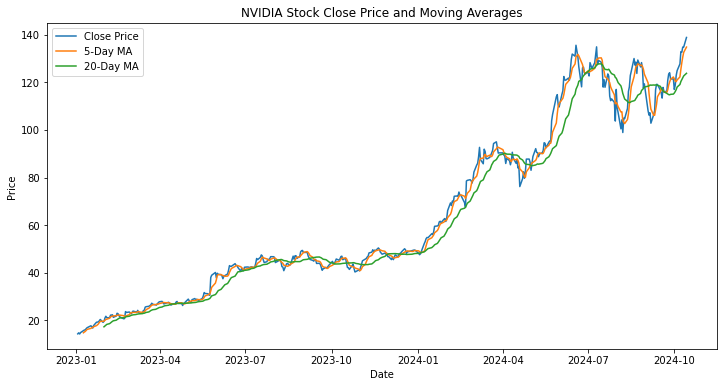

In [9]:
import matplotlib.pyplot as plt

# Setting the figure size for better readability
plt.figure(figsize=(12, 6))

# Close Price and Moving Averages
plt.plot(nvidia_data['Date'], nvidia_data['Close'], label='Close Price')
plt.plot(nvidia_data['Date'], nvidia_data['MA_5'], label='5-Day MA')
plt.plot(nvidia_data['Date'], nvidia_data['MA_20'], label='20-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVIDIA Stock Close Price and Moving Averages')
plt.legend()
plt.show()

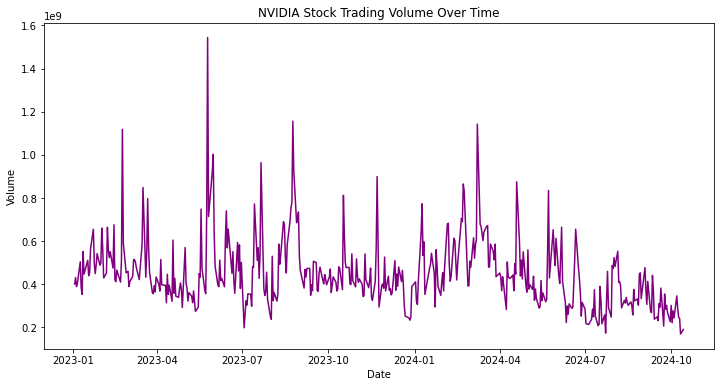

In [8]:
# Volume over Time
plt.figure(figsize=(12, 6))
plt.plot(nvidia_data['Date'], nvidia_data['Volume'], color='purple')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.show()


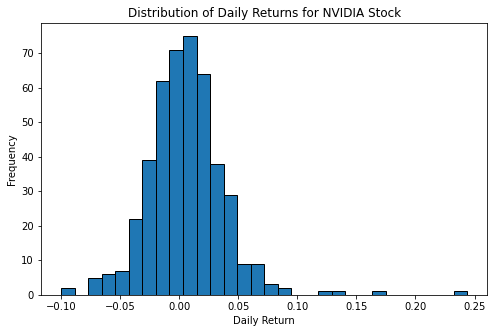

In [7]:
# Distribution of Daily Returns
nvidia_data['Daily Return'] = nvidia_data['Close'].pct_change()
plt.figure(figsize=(8, 5))
plt.hist(nvidia_data['Daily Return'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns for NVIDIA Stock')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop initial rows with NaN values in moving averages
nvidia_data = nvidia_data.dropna().reset_index(drop=True)

# Define feature set and target variable
features = nvidia_data[['Close', 'MA_5', 'MA_20', 'Volume']]
target = nvidia_data['Close']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 7.287194103958237e-14
Mean Squared Error: 5.670992628416725e-27


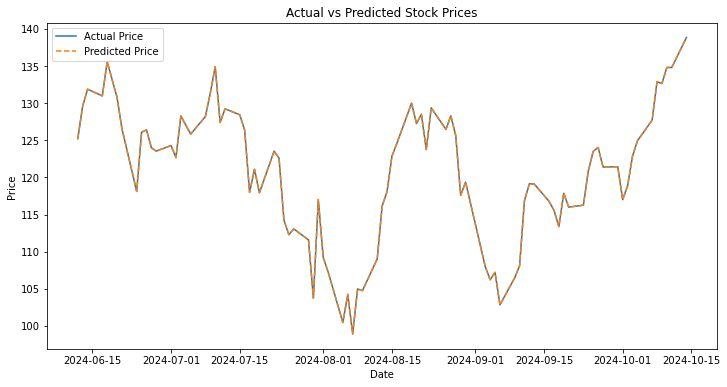

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(nvidia_data['Date'][-len(y_test):], y_test, label='Actual Price')
plt.plot(nvidia_data['Date'][-len(y_test):], y_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
